In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Класс Difur
В классе Difur происходит подсчет производной exp(-3x)*(C1+x*C2+x^2*C3+x^3*C4+x^4*C5)=y, подставляются значения начальных условий, считаются константы(C1,C2,C3,C4,C5) и строятся графики зависимостей времени от итерации подсчета производных.

In [2]:
class Difur:
    operations = []
    solved = dict()
    def add_operations(self, oper):
        self.operations.append(oper)
        
    # Инициализация класса Difur
    def __init__(self):
        self.t1 = 0 
        self.operations = []
        self.time_it = []
        self.iteration = []
        for i in range(1, 6):
            self.solved['C'+str(i)] = None
            
    # Вывести выражение
    def show_dif(self, num):
        print(str(num)+':', end='')
        for i in range(len(self.operations)):
            op = self.operations[i]
            if op['const'] >=0:
                print('+', end='')
            print(op['const'], end='')
            print(op['c'], end='')
            print('x^'+str(op['x']), end='')
            print('exp('+str(op['exp'])+'x)', end='')
        print()
        
    # Посчитать производную
    def count_dif(self, num):
        oper = []
        for i in range(len(self.operations)):
            one_operation = []
            op = self.operations[i]
            keys = list(op.keys())
            for j in range(len(keys)):
                if keys[j] == 'exp':
                    new_oper = dict()
                    new_oper['c'] = op['c']
                    new_oper['x'] = op['x']
                    new_oper['exp'] = op['exp']
                    new_oper['const'] = op['const']*op['exp']
                    one_operation.append(new_oper)
                if keys[j] == 'x' and op['x']!=0:
                    new_oper = dict()
                    new_oper['c'] = op['c']
                    new_oper['x'] = op['x']-1
                    new_oper['exp'] = op['exp']
                    new_oper['const'] = op['const']*op['x']
                    one_operation.append(new_oper)
            oper+=one_operation
        self.operations = oper

    # Посчитать занчение констант взависимости от x и y
    def solution(self, num, x, y):
        const = 0
        consted = []
        for i in range(len(self.operations)):
            op = self.operations[i]
            new_const = (x**op['x'])*(op['const'])*(np.exp(op['exp']*x))
            if self.solved[op['c']] != None:
                new_const *= self.solved[op['c']]
                if new_const != 0:
                    consted.append(new_const)
            else:
                const += new_const
        n = (y-sum(consted))/const
        self.solved['C'+str(num)] = n
        print('C'+str(num)+':'+str(n))
        print()
        
    # Вывести выражениие после подстановки значений
    def count_num(self, num, x, y):
        print(str(num)+':', end='')

        for i in range(len(self.operations)):
            op = self.operations[i]
            new_const =  (x**op['x'])*(op['const'])*(np.exp(op['exp']*x))

            if new_const != 0:
                if new_const>0:
                    print('+', end='')
                
                print(new_const, end='')
                print(op['c'], end='')
        print('=', y)
        self.solution(num,x,y)
                
    # Нарисовать график зависимости итераций и времени выполнения
    def plot_time_graph(self):
        print(self.time_it)
        plt.scatter(self.iteration, self.time_it, c= 'b')
        plt.plot(self.iteration, self.time_it)
        plt.xlabel('Номер итерации')
        plt.ylabel('Время')
        plt.title('График зависимости времени от итерации')
        plt.show()

    # Нарисовать график зависимости итераций и констант, подсчитанных на каждой итерации                
    def plot_constants(self, num):
        const = []
        self.iteration = [1]+self.iteration
        for i in self.iteration:
            const.append(self.solved['C'+str(i)])
        plt.scatter(self.iteration,const, c = 'y')
        plt.xlabel('Номер итерации')
        plt.ylabel('Константы')
        plt.title('Подсчёт констант на следующих итерациях')
        plt.show()


In [3]:
operations = [{'const':1, 'exp':-3, 'x':0, 'c': 'C1'}, 
  {'const':1, 'exp':-3, 'x':1, 'c': 'C2'},
  {'const':1, 'exp':-3, 'x':2, 'c': 'C3'},
  {'const':1, 'exp':-3, 'x':3, 'c': 'C4'},
  {'const':1, 'exp':-3, 'x':4, 'c': 'C5'}]

solutions = ((0, 0), (0, -3), (0, -9), (0, -8), (0,0))

В функции count_const происходит вызов класса Difur и последовательно считаются значения констант. 

In [9]:
def count_const(num):
  dif = Difur()
  for oper in operations:
    dif.add_operations(oper)
    
  for i in range(1, num):
    if i!=1:
        dif.count_dif(i)
        dif.iteration.append(i)
        
    else:
        dif.t1 = time.time()
    dif.show_dif(i)
    if num-1 == len(solutions):
      dif.count_num(i, *solutions[i-1])

    if i!= 1:
        t2 = time.time()
        dif.time_it.append(t2-dif.t1)
        dif.t1 = t2
  dif.plot_time_graph()
  if num-1 == len(solutions):
    dif.plot_constants(num)

Вычисление значений констант заданного уравнения, подсчет времени выполнения программы и построение графика констант и итераций, на которых была подсчитана соответствующая константа.

1:+1C1x^0exp(-3x)+1C2x^1exp(-3x)+1C3x^2exp(-3x)+1C4x^3exp(-3x)+1C5x^4exp(-3x)
1:+1.0C1= 0
C1:0.0

2:-3C1x^0exp(-3x)-3C2x^1exp(-3x)+1C2x^0exp(-3x)-3C3x^2exp(-3x)+2C3x^1exp(-3x)-3C4x^3exp(-3x)+3C4x^2exp(-3x)-3C5x^4exp(-3x)+4C5x^3exp(-3x)
2:-3.0C1+1.0C2= -3
C2:-3.0

3:+9C1x^0exp(-3x)-3C2x^0exp(-3x)+9C2x^1exp(-3x)-3C2x^0exp(-3x)-6C3x^1exp(-3x)+9C3x^2exp(-3x)+2C3x^0exp(-3x)-6C3x^1exp(-3x)-9C4x^2exp(-3x)+9C4x^3exp(-3x)+6C4x^1exp(-3x)-9C4x^2exp(-3x)-12C5x^3exp(-3x)+9C5x^4exp(-3x)+12C5x^2exp(-3x)-12C5x^3exp(-3x)
3:+9.0C1-3.0C2-3.0C2+2.0C3= -9
C3:-13.5

4:-27C1x^0exp(-3x)+9C2x^0exp(-3x)+9C2x^0exp(-3x)-27C2x^1exp(-3x)+9C2x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)+18C3x^1exp(-3x)-27C3x^2exp(-3x)-6C3x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)+27C4x^2exp(-3x)-27C4x^3exp(-3x)+6C4x^0exp(-3x)-18C4x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)+36C5x^3exp(-3x)-27C5x^4exp(-3x)+24C5x^1exp(-3x)-36C5x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)
4:-27

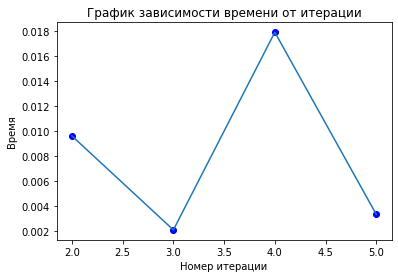

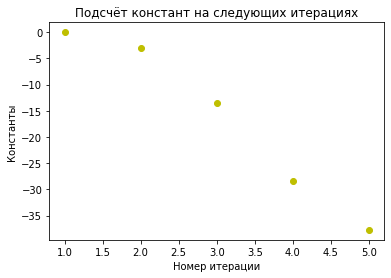

In [10]:
count_const(6)

График времени подсчета производной при 10 итерациях



1:+1C1x^0exp(-3x)+1C2x^1exp(-3x)+1C3x^2exp(-3x)+1C4x^3exp(-3x)+1C5x^4exp(-3x)
2:-3C1x^0exp(-3x)-3C2x^1exp(-3x)+1C2x^0exp(-3x)-3C3x^2exp(-3x)+2C3x^1exp(-3x)-3C4x^3exp(-3x)+3C4x^2exp(-3x)-3C5x^4exp(-3x)+4C5x^3exp(-3x)
3:+9C1x^0exp(-3x)-3C2x^0exp(-3x)+9C2x^1exp(-3x)-3C2x^0exp(-3x)-6C3x^1exp(-3x)+9C3x^2exp(-3x)+2C3x^0exp(-3x)-6C3x^1exp(-3x)-9C4x^2exp(-3x)+9C4x^3exp(-3x)+6C4x^1exp(-3x)-9C4x^2exp(-3x)-12C5x^3exp(-3x)+9C5x^4exp(-3x)+12C5x^2exp(-3x)-12C5x^3exp(-3x)
4:-27C1x^0exp(-3x)+9C2x^0exp(-3x)+9C2x^0exp(-3x)-27C2x^1exp(-3x)+9C2x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)+18C3x^1exp(-3x)-27C3x^2exp(-3x)-6C3x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)+27C4x^2exp(-3x)-27C4x^3exp(-3x)+6C4x^0exp(-3x)-18C4x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)+36C5x^3exp(-3x)-27C5x^4exp(-3x)+24C5x^1exp(-3x)-36C5x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)
5:+81C1x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)+81C2x^1exp(-3x)-27C2x^0exp(

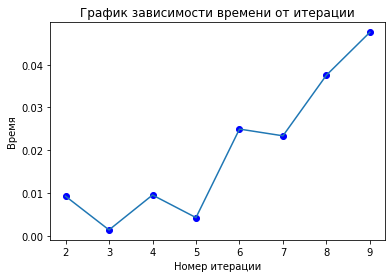

In [11]:
count_const(10)

График времени подсчета производной при 15 итерациях


1:+1C1x^0exp(-3x)+1C2x^1exp(-3x)+1C3x^2exp(-3x)+1C4x^3exp(-3x)+1C5x^4exp(-3x)
2:-3C1x^0exp(-3x)-3C2x^1exp(-3x)+1C2x^0exp(-3x)-3C3x^2exp(-3x)+2C3x^1exp(-3x)-3C4x^3exp(-3x)+3C4x^2exp(-3x)-3C5x^4exp(-3x)+4C5x^3exp(-3x)
3:+9C1x^0exp(-3x)-3C2x^0exp(-3x)+9C2x^1exp(-3x)-3C2x^0exp(-3x)-6C3x^1exp(-3x)+9C3x^2exp(-3x)+2C3x^0exp(-3x)-6C3x^1exp(-3x)-9C4x^2exp(-3x)+9C4x^3exp(-3x)+6C4x^1exp(-3x)-9C4x^2exp(-3x)-12C5x^3exp(-3x)+9C5x^4exp(-3x)+12C5x^2exp(-3x)-12C5x^3exp(-3x)
4:-27C1x^0exp(-3x)+9C2x^0exp(-3x)+9C2x^0exp(-3x)-27C2x^1exp(-3x)+9C2x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)+18C3x^1exp(-3x)-27C3x^2exp(-3x)-6C3x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)+27C4x^2exp(-3x)-27C4x^3exp(-3x)+6C4x^0exp(-3x)-18C4x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)+36C5x^3exp(-3x)-27C5x^4exp(-3x)+24C5x^1exp(-3x)-36C5x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)
5:+81C1x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)+81C2x^1exp(-3x)-27C2x^0exp(

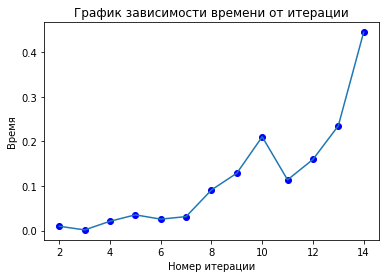

In [13]:
count_const(15)

График времени подсчета производной при 20 итерациях


1:+1C1x^0exp(-3x)+1C2x^1exp(-3x)+1C3x^2exp(-3x)+1C4x^3exp(-3x)+1C5x^4exp(-3x)
2:-3C1x^0exp(-3x)-3C2x^1exp(-3x)+1C2x^0exp(-3x)-3C3x^2exp(-3x)+2C3x^1exp(-3x)-3C4x^3exp(-3x)+3C4x^2exp(-3x)-3C5x^4exp(-3x)+4C5x^3exp(-3x)
3:+9C1x^0exp(-3x)-3C2x^0exp(-3x)+9C2x^1exp(-3x)-3C2x^0exp(-3x)-6C3x^1exp(-3x)+9C3x^2exp(-3x)+2C3x^0exp(-3x)-6C3x^1exp(-3x)-9C4x^2exp(-3x)+9C4x^3exp(-3x)+6C4x^1exp(-3x)-9C4x^2exp(-3x)-12C5x^3exp(-3x)+9C5x^4exp(-3x)+12C5x^2exp(-3x)-12C5x^3exp(-3x)
4:-27C1x^0exp(-3x)+9C2x^0exp(-3x)+9C2x^0exp(-3x)-27C2x^1exp(-3x)+9C2x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)+18C3x^1exp(-3x)-27C3x^2exp(-3x)-6C3x^0exp(-3x)-6C3x^0exp(-3x)+18C3x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)+27C4x^2exp(-3x)-27C4x^3exp(-3x)+6C4x^0exp(-3x)-18C4x^1exp(-3x)-18C4x^1exp(-3x)+27C4x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)+36C5x^3exp(-3x)-27C5x^4exp(-3x)+24C5x^1exp(-3x)-36C5x^2exp(-3x)-36C5x^2exp(-3x)+36C5x^3exp(-3x)
5:+81C1x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)-27C2x^0exp(-3x)+81C2x^1exp(-3x)-27C2x^0exp(

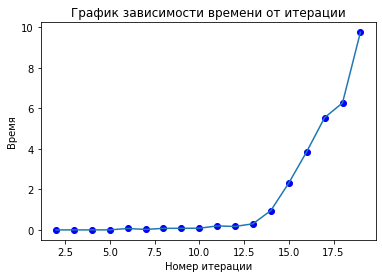

In [14]:
count_const(20)